In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, SimpleRNN, Dropout
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv('heart.csv')

# Tampilkan beberapa baris
print(df.head())

# Pisahkan fitur dan target
X = df.drop('chol', axis=1)  # Fitur
y = df['trestbps']              # Target (0 atau 1)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [3]:
# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ubah data menjadi format (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])  # timestep = 1
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [4]:
# Bangun model Bidirectional RNN
model = Sequential()

# Tambahkan lapisan Bidirectional RNN
model.add(Bidirectional(SimpleRNN(64, activation='relu', return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])))

# Tambahkan lapisan dropout untuk regularisasi
model.add(Dropout(0.2))

# Tambahkan lapisan output
model.add(Dense(1, activation='sigmoid'))  # Output biner

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Ringkasan model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 128)                 │           9,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Latih model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.0000e+00 - loss: 58.6996 - val_accuracy: 0.0000e+00 - val_loss: -60.0344
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0000e+00 - loss: -80.1805 - val_accuracy: 0.0000e+00 - val_loss: -204.6444
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -212.6174 - val_accuracy: 0.0000e+00 - val_loss: -355.8376
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -360.6106 - val_accuracy: 0.0000e+00 - val_loss: -527.4035
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -536.0928 - val_accuracy: 0.0000e+00 - val_loss: -726.4949
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -739.5252 - val_accuracy: 0.0000e+00 - val_loss: -956.2964
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -978.8599 - val_accuracy: 0.0000e+00 - val_loss: -1230.8040
Epoch 8/20
21/21 ━━━━━

In [6]:
# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.2f}")
print(f"Test Accuracy: {accuracy:.2f}")

# Prediksi
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -10925.3008 
Test Loss: -10974.68
Test Accuracy: 0.00
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
          94       0.00      0.00      0.00       1.0
         100       0.00      0.00      0.00       3.0
         102       0.00      0.00      0.00       1.0
         104       0.00      0.00      0.00       1.0
         105       0.00      0.00      0.00       2.0
         106       0.00      0.00      0.00       1.0
         108       0.00      0.00      0.00       4.0
         110       0.00      0.00      0.00      13.0
         112       0.00      0.00      0.00       6.0
         114       0.00      0.00      0.00       1.0
         115       0.00      0.00      0.00       2.0
         117       0.00      0.00      0.00       1.0
         118       0.00      0.00      0.00       5.0
     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

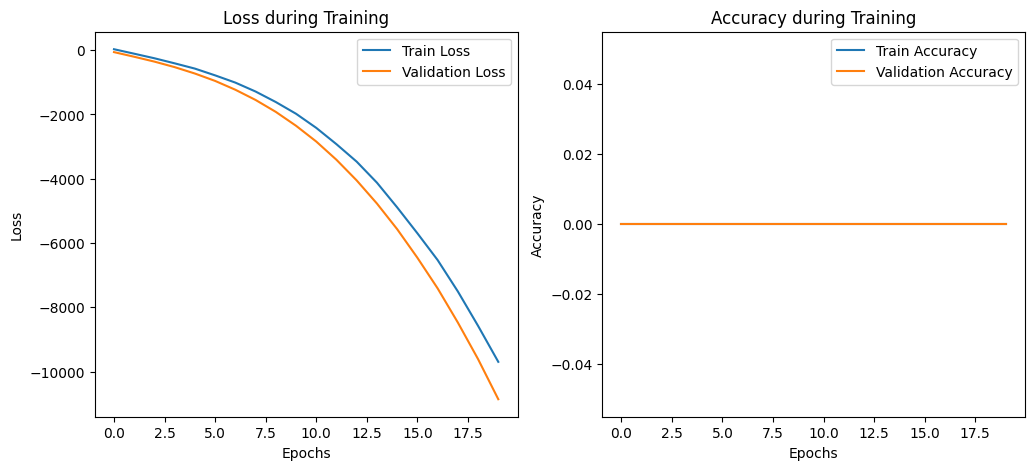

In [7]:
# Plot hasil pelatihan
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy during Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()